<a href="https://colab.research.google.com/github/mboytchev/P5A_Rugby_Vision/blob/main/Utilisation_du_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


image 1/1 c:\Users\Admin\OneDrive\Documents\Bureau\5A\[Projet] RUGBY VISION\frames_output\frame_23.png: 384x640 1 poteaux, 1634.8ms
Speed: 10.5ms preprocess, 1634.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\Admin\OneDrive\Documents\Bureau\5A\[Projet] RUGBY VISION\frames_output\frame_23.png: 384x640 1 Terrain, 1934.8ms
Speed: 6.0ms preprocess, 1934.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


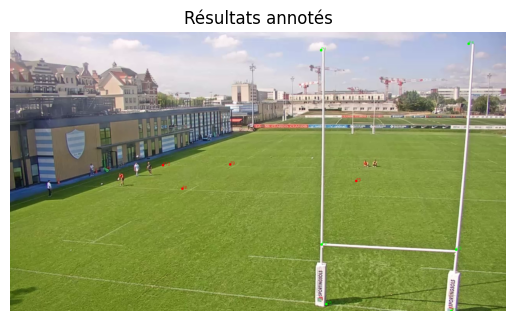

Keypoints validés (Poteaux) : [{'keypoint_id': 1, 'x': 1204.578857421875, 'y': 70.07551574707031}, {'keypoint_id': 2, 'x': 1206.3453369140625, 'y': 822.2083740234375}, {'keypoint_id': 3, 'x': 1727.3402099609375, 'y': 842.2930297851562}, {'keypoint_id': 4, 'x': 1775.791015625, 'y': 45.8199462890625}, {'keypoint_id': 5, 'x': 1708.2283935546875, 'y': 1080.0}, {'keypoint_id': 6, 'x': 1224.1168212890625, 'y': 1053.698974609375}]
Keypoints validés (Terrain) : [{'keypoint_name': '', 'x': 1340.365478515625, 'y': 576.8364868164062}, {'keypoint_name': 'P6_ligne_15m', 'x': 667.0126342773438, 'y': 606.3628540039062}, {'keypoint_name': 'T9_ligne_10m', 'x': 852.8831787109375, 'y': 512.4700927734375}, {'keypoint_name': 'T12_ligne_10m', 'x': 592.5503540039062, 'y': 515.1111450195312}]


In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Charger les modèles entraînés
model_poteaux = YOLO("modèle_poteau_50.pt")
model_terrain = YOLO("model_terrain_60.pt")

# Chemin de l'image
image_path = "frames_output/frame_23.png"

results_poteaux = model_poteaux(image_path)
results_terrain = model_terrain(image_path)

image = cv2.imread(image_path)

# Seuil de confiance minimum
confidence_threshold = 0.7

# Couleurs pour les keypoints des deux modèles
color_pteaux = (0, 255, 0)  # Vert pour le modèle "Pteaux"
color_terrain = (0, 0, 255)  # Rouge pour le modèle "Terrain"

# Ajouter les keypoints du modèle "Pteaux"
for instance_idx, keypoints in enumerate(results_poteaux[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Dessiner le point clé
            cv2.circle(image, (int(x.item()), int(y.item())), 5, color_pteaux, -1)
            # Annoter avec l'ID du keypoint
            cv2.putText(
                image, f"P{keypoint_idx + 1}", (int(x.item()), int(y.item())),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=color_pteaux, thickness=1
            )

# Ajouter les keypoints du modèle "Terrain"
for instance_idx, keypoints in enumerate(results_terrain[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Dessiner le point clé
            cv2.circle(image, (int(x.item()), int(y.item())), 5, color_terrain, -1)
            # Annoter avec l'ID du keypoint
            cv2.putText(
                image, f"T{keypoint_idx + 1}", (int(x.item()), int(y.item())),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=color_terrain, thickness=1
            )

# Afficher l'image avec les keypoints des deux modèles
#cv2.imshow("image :",image) #affichage non fonctionnel

# Convertir l'image BGR (OpenCV) en RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image avec Matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Désactiver les axes
plt.title("Résultats annotés")
plt.show()


# Récupérer les keypoints validés du modèle "Poteaux"
filtered_keypoints_poteaux = []
for instance_idx, keypoints in enumerate(results_poteaux[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Ajouter l'ID, les coordonnées et la confiance à la liste
            filtered_keypoints_poteaux.append({
                "keypoint_id": keypoint_idx + 1,  # ID du keypoint
                "x": x.item(),
                "y": y.item()
            })

# Récupérer et renommer les keypoints validés du modèle "Terrain"
filtered_keypoints_terrain = []
for keypoint_idx, keypoints in enumerate(results_terrain[0].keypoints.data):
    for kp_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Déterminer le type de ligne et inclure dans le nom
            if kp_idx + 1 in [5]:  # Keypoints pour la ligne des 22 m
                keypoint_name = ""
            elif kp_idx + 1 in [6]:  # Keypoints pour la ligne des 15 m
                keypoint_name = f"P{kp_idx + 1}_ligne_15m"
            elif kp_idx + 1 in [7]:  # Keypoints pour la ligne des 22 m
                keypoint_name = "15_32"
            elif  kp_idx + 1 in [8]:  # Keypoints pour la ligne des 15 m
                keypoint_name = "15_50"
            elif kp_idx + 1 in [9]:  # Keypoints pour la ligne des 10 m
                keypoint_name = f"T{kp_idx + 1}_ligne_10m"
            elif kp_idx + 1 in [10]:  # Keypoints pour la ligne des 10 m
                keypoint_name = "5_32"
            elif kp_idx + 1 in [11]:
              keypoint_name = "15_50"
            elif kp_idx + 1 in [12]:
              keypoint_name = f"T{kp_idx + 1}_ligne_10m"
            else:
                keypoint_name = f"T{kp_idx + 1}_autre"  # Par défaut, si un keypoint n'appartient pas à ces lignes

            # Ajouter les informations à la liste
            filtered_keypoints_terrain.append({
                "keypoint_name": keypoint_name,
                "x": x.item(),
                "y": y.item()
            })



# Afficher les résultats
print("Keypoints validés (Poteaux) :", filtered_keypoints_poteaux)
print("Keypoints validés (Terrain) :", filtered_keypoints_terrain)